In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pag = pd.read_csv("../data/ab-test.csv")
pag

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [3]:
df_test = pag[pag['group'] == 'test']
df_control = pag[pag['group'] == 'control']
df_test

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [4]:
df_control

,uid,diff,time,group
14,user_12,-75.000000,after,control
15,user_12,-103.000000,before,control
16,user_13,-81.500000,after,control
17,user_13,-15.500000,before,control
18,user_15,-32.000000,after,control
19,user_15,-3.000000,before,control
20,user_16,17.500000,after,control
21,user_16,-153.000000,before,control
22,user_2,-94.000000,after,control
23,user_2,-202.000000,before,control


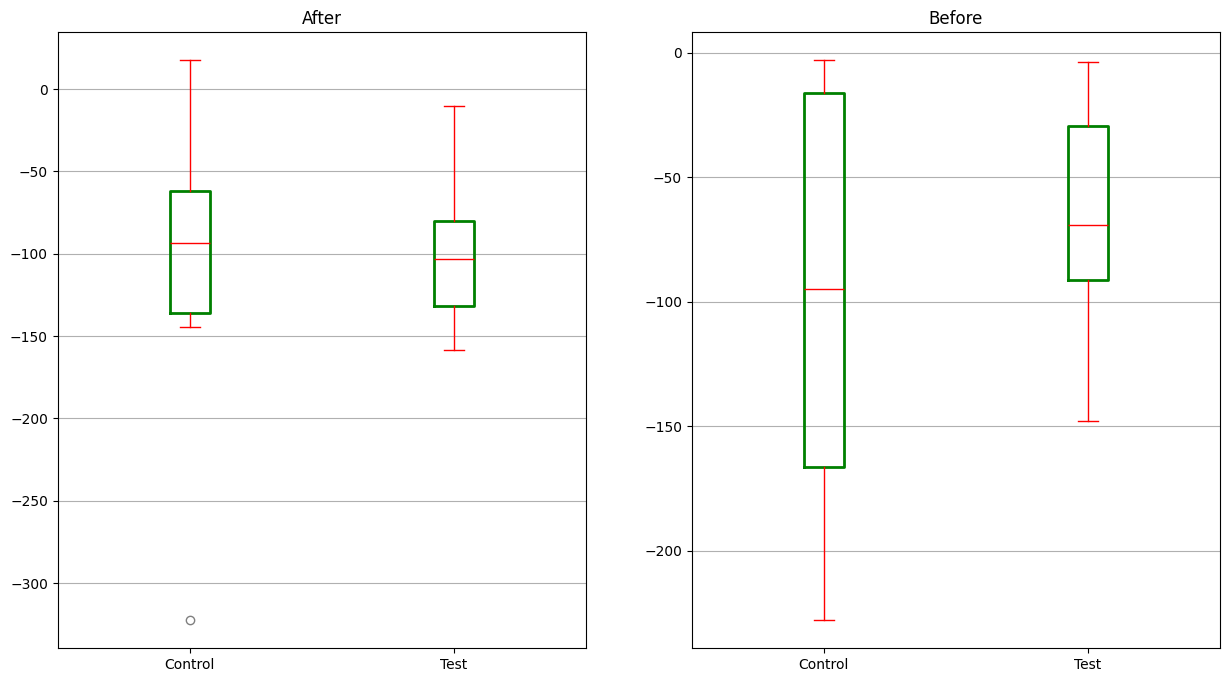

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))

ax[0].boxplot([df_control[df_control['time'] == 'after']['diff'],df_test[df_test['time'] == 'after']['diff']],boxprops=dict(color='green',linewidth=2),
                  whiskerprops=dict(color='red'),
                  capprops=dict(color='red'),
                  medianprops=dict(color='red'),
                  flierprops=dict(marker='o', color='red', alpha=0.5))

ax[1].boxplot([df_control[df_control['time'] == 'before']['diff'],df_test[df_test['time'] == 'before']['diff']],boxprops=dict(color='green',linewidth=2),
                  whiskerprops=dict(color='red'),
                  capprops=dict(color='red'),
                  medianprops=dict(color='red'),
                  flierprops=dict(marker='o', color='red', alpha=0.5))
ax[0].set_title('After')
ax[1].set_title('Before')
ax[0].set_xticklabels(['Control', 'Test'])
ax[1].set_xticklabels(['Control', 'Test'])
ax[0].grid(True,axis='y')
ax[1].grid(True,axis='y')
plt.show()

What was the IQR of the control group before the newsfeed

In [6]:
q1 = np.quantile(df_control[df_control['time'] == 'before']['diff'],0.25)
q1
q3 = np.quantile(df_control[df_control['time'] == 'before']['diff'], 0.75)
q3
iqr = q3 - q1
iqr

150.0

In [7]:
q1 = np.quantile(df_control[df_control['time'] == 'after']['diff'],0.25)
q1
q3 = np.quantile(df_control[df_control['time'] == 'after']['diff'], 0.75)
q3
iqr = q3 - q1
iqr

74.16666666666666